# Preprocessing

## Import Libraries


In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.svm import SVC

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import joblib


## Set Params


In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

## Load Dataset


In [3]:
# Loading the dataset.
df = pd.read_csv("./dataset/kaggle_bot_accounts.csv")
df.head()

,Unnamed: 0,NAME,GENDER,EMAIL_ID,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,REGISTRATION_IPV4,REGISTRATION_LOCATION,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,ISBOT
0,0,Johnny KerrThomas,Male,jacksonalan@example.com,False,53.0,87.0,5.0,3.0,124.0,NaN,81.88.75.170,Argentina,16.0,10.0,3.0,NaN
1,1,Dwayne LarsenLara,Male,calvin80@example.com,True,16.0,67.0,5.0,NaN,26.0,24.97,NaN,New Zealand,14.0,5.0,2.0,NaN
2,2,NaN,Male,qbrown@example.net,True,44.0,81.0,4.0,17.0,125.0,7.75,159.202.103.178,Costa Rica,16.0,4.0,0.0,False
3,3,Russell SimmonsPhillips,Male,kimberlywagner@example.com,True,23.0,114.0,5.0,24.0,67.0,13.40,196.11.132.51,Italy,21.0,10.0,1.0,False
4,4,Jamie WilsonMartinez,Female,shaunbrooks@example.com,False,46.0,112.0,2.0,12.0,63.0,24.83,159.196.199.20,Belgium,10.0,6.0,2.0,False


## Check columns


In [4]:
# Drop unused column
df = df.drop('Unnamed: 0', axis=1)


In [5]:
for col in df.columns:
    print(col)

NAME
GENDER
EMAIL_ID
IS_GLOGIN
FOLLOWER_COUNT
FOLLOWING_COUNT
DATASET_COUNT
CODE_COUNT
DISCUSSION_COUNT
AVG_NB_READ_TIME_MIN
REGISTRATION_IPV4
REGISTRATION_LOCATION
TOTAL_VOTES_GAVE_NB
TOTAL_VOTES_GAVE_DS
TOTAL_VOTES_GAVE_DC
ISBOT


### Column informations

1. **NAME**: The name of the individual.
2. **GENDER**: The gender of the individual, either male or female.
3. **EMAIL_ID**: The email address of the individual.
4. **IS_GLOGIN**: A boolean indicating whether the individual used Google login to register or not.
5. **FOLLOWER_COUNT**: The number of followers the individual has.
6. **FOLLOWING_COUNT**: The number of individuals the individual is following.
7. **DATASET_COUNT**: The number of datasets the individual has created.
8. **CODE_COUNT**: The number of notebooks the individual has created.
9. **DISCUSSION_COUNT**: The number of discussions the individual has participated in.
10. **AVG_NB_READ_TIME_MIN**: The average time spent reading notebooks in minutes.
11. **REGISTRATION_IPV4**: The IP address used to register.
12. **REGISTRATION_LOCATION**: The location from where the individual registered.
13. **TOTAL_VOTES_GAVE_NB**: The total number of votes the individual has given to notebooks.
14. **TOTAL_VOTES_GAVE_DS**: The total number of votes the individual has given to datasets.
15. **TOTAL_VOTES_GAVE_DC**: The total number of votes the individual has given to discussion comments.
16. **ISBOT**: A boolean indicating whether the individual is a bot or not.


In [6]:
# Remove probable unrelated columns
df = df.drop('NAME', axis=1)
df = df.drop('EMAIL_ID', axis=1)
df = df.drop('REGISTRATION_LOCATION', axis=1)
df = df.drop('REGISTRATION_IPV4', axis=1)


## Check null values & duplicated rows


In [7]:
df.shape

(1321188, 12)

In [8]:
df.duplicated().sum()


684

In [9]:
df.isna().sum()


GENDER                  77879
IS_GLOGIN               77916
FOLLOWER_COUNT          77712
FOLLOWING_COUNT         78445
DATASET_COUNT           78567
CODE_COUNT              77926
DISCUSSION_COUNT        77722
AVG_NB_READ_TIME_MIN    78316
TOTAL_VOTES_GAVE_NB     77705
TOTAL_VOTES_GAVE_DS     77934
TOTAL_VOTES_GAVE_DC     78030
ISBOT                   78500
dtype: int64

In [10]:
# Displaying columns with missing values using sum and percentage
missing_values = df.isnull().sum().sort_values(ascending = True)
percent = ((df.isnull().sum()/df.isnull().count()) * 100) .sort_values(ascending=True).round(2)
missing_data = pd.concat([missing_values, percent], axis = 1, keys = ["Values", "Percentage"])
missing_data

,Values,Percentage
TOTAL_VOTES_GAVE_NB,77705,5.88
FOLLOWER_COUNT,77712,5.88
DISCUSSION_COUNT,77722,5.88
GENDER,77879,5.89
IS_GLOGIN,77916,5.90
CODE_COUNT,77926,5.90
TOTAL_VOTES_GAVE_DS,77934,5.90
TOTAL_VOTES_GAVE_DC,78030,5.91
AVG_NB_READ_TIME_MIN,78316,5.93
FOLLOWING_COUNT,78445,5.94


In [11]:
df.dtypes

GENDER                   object
IS_GLOGIN                object
FOLLOWER_COUNT          float64
FOLLOWING_COUNT         float64
DATASET_COUNT           float64
CODE_COUNT              float64
DISCUSSION_COUNT        float64
AVG_NB_READ_TIME_MIN    float64
TOTAL_VOTES_GAVE_NB     float64
TOTAL_VOTES_GAVE_DS     float64
TOTAL_VOTES_GAVE_DC     float64
ISBOT                    object
dtype: object

### Fill null values with mean or mode


In [12]:
for col in df.columns:
    if df[col].isna().sum():
        # If column is float, replace with mean
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(
                round(df[col].mean())
            )
        
        # If column is 'GENDER' or 'IS_GLOGIN', replace with mode
        elif col == 'GENDER' or col == 'IS_GLOGIN':
            df[col] = df[col].fillna(
                df[col].mode()[0]
            ).infer_objects(copy=False)

C:\Users\y\AppData\Local\Temp\ipykernel_32284\4247370503.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(


In [13]:
df.isna().sum()

GENDER                      0
IS_GLOGIN                   0
FOLLOWER_COUNT              0
FOLLOWING_COUNT             0
DATASET_COUNT               0
CODE_COUNT                  0
DISCUSSION_COUNT            0
AVG_NB_READ_TIME_MIN        0
TOTAL_VOTES_GAVE_NB         0
TOTAL_VOTES_GAVE_DS         0
TOTAL_VOTES_GAVE_DC         0
ISBOT                   78500
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321188 entries, 0 to 1321187
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   GENDER                1321188 non-null  object 
 1   IS_GLOGIN             1321188 non-null  bool   
 2   FOLLOWER_COUNT        1321188 non-null  float64
 3   FOLLOWING_COUNT       1321188 non-null  float64
 4   DATASET_COUNT         1321188 non-null  float64
 5   CODE_COUNT            1321188 non-null  float64
 6   DISCUSSION_COUNT      1321188 non-null  float64
 7   AVG_NB_READ_TIME_MIN  1321188 non-null  float64
 8   TOTAL_VOTES_GAVE_NB   1321188 non-null  float64
 9   TOTAL_VOTES_GAVE_DS   1321188 non-null  float64
 10  TOTAL_VOTES_GAVE_DC   1321188 non-null  float64
 11  ISBOT                 1242688 non-null  object 
dtypes: bool(1), float64(9), object(2)
memory usage: 112.1+ MB


In [15]:
df = df.dropna()
df.shape


(1242688, 12)

## Check statistical value of dataset


In [16]:
df.describe().round(2)

,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
count,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00,1242688.00
mean,26.98,45.04,2.59,10.36,65.85,12.76,17.53,6.53,1.53
std,22.32,38.29,2.43,8.00,46.13,9.28,4.48,2.23,1.09
min,0.00,0.00,0.00,0.00,0.00,0.00,10.00,3.00,0.00
25%,2.00,3.00,0.00,1.00,13.00,1.98,14.00,5.00,1.00
50%,27.00,44.00,2.00,10.00,66.00,13.00,18.00,7.00,2.00
75%,46.00,77.00,5.00,17.00,105.00,20.59,21.00,8.00,2.00
max,70.00,120.00,7.00,25.00,150.00,29.99,25.00,10.00,3.00


### Check numerical data distributions


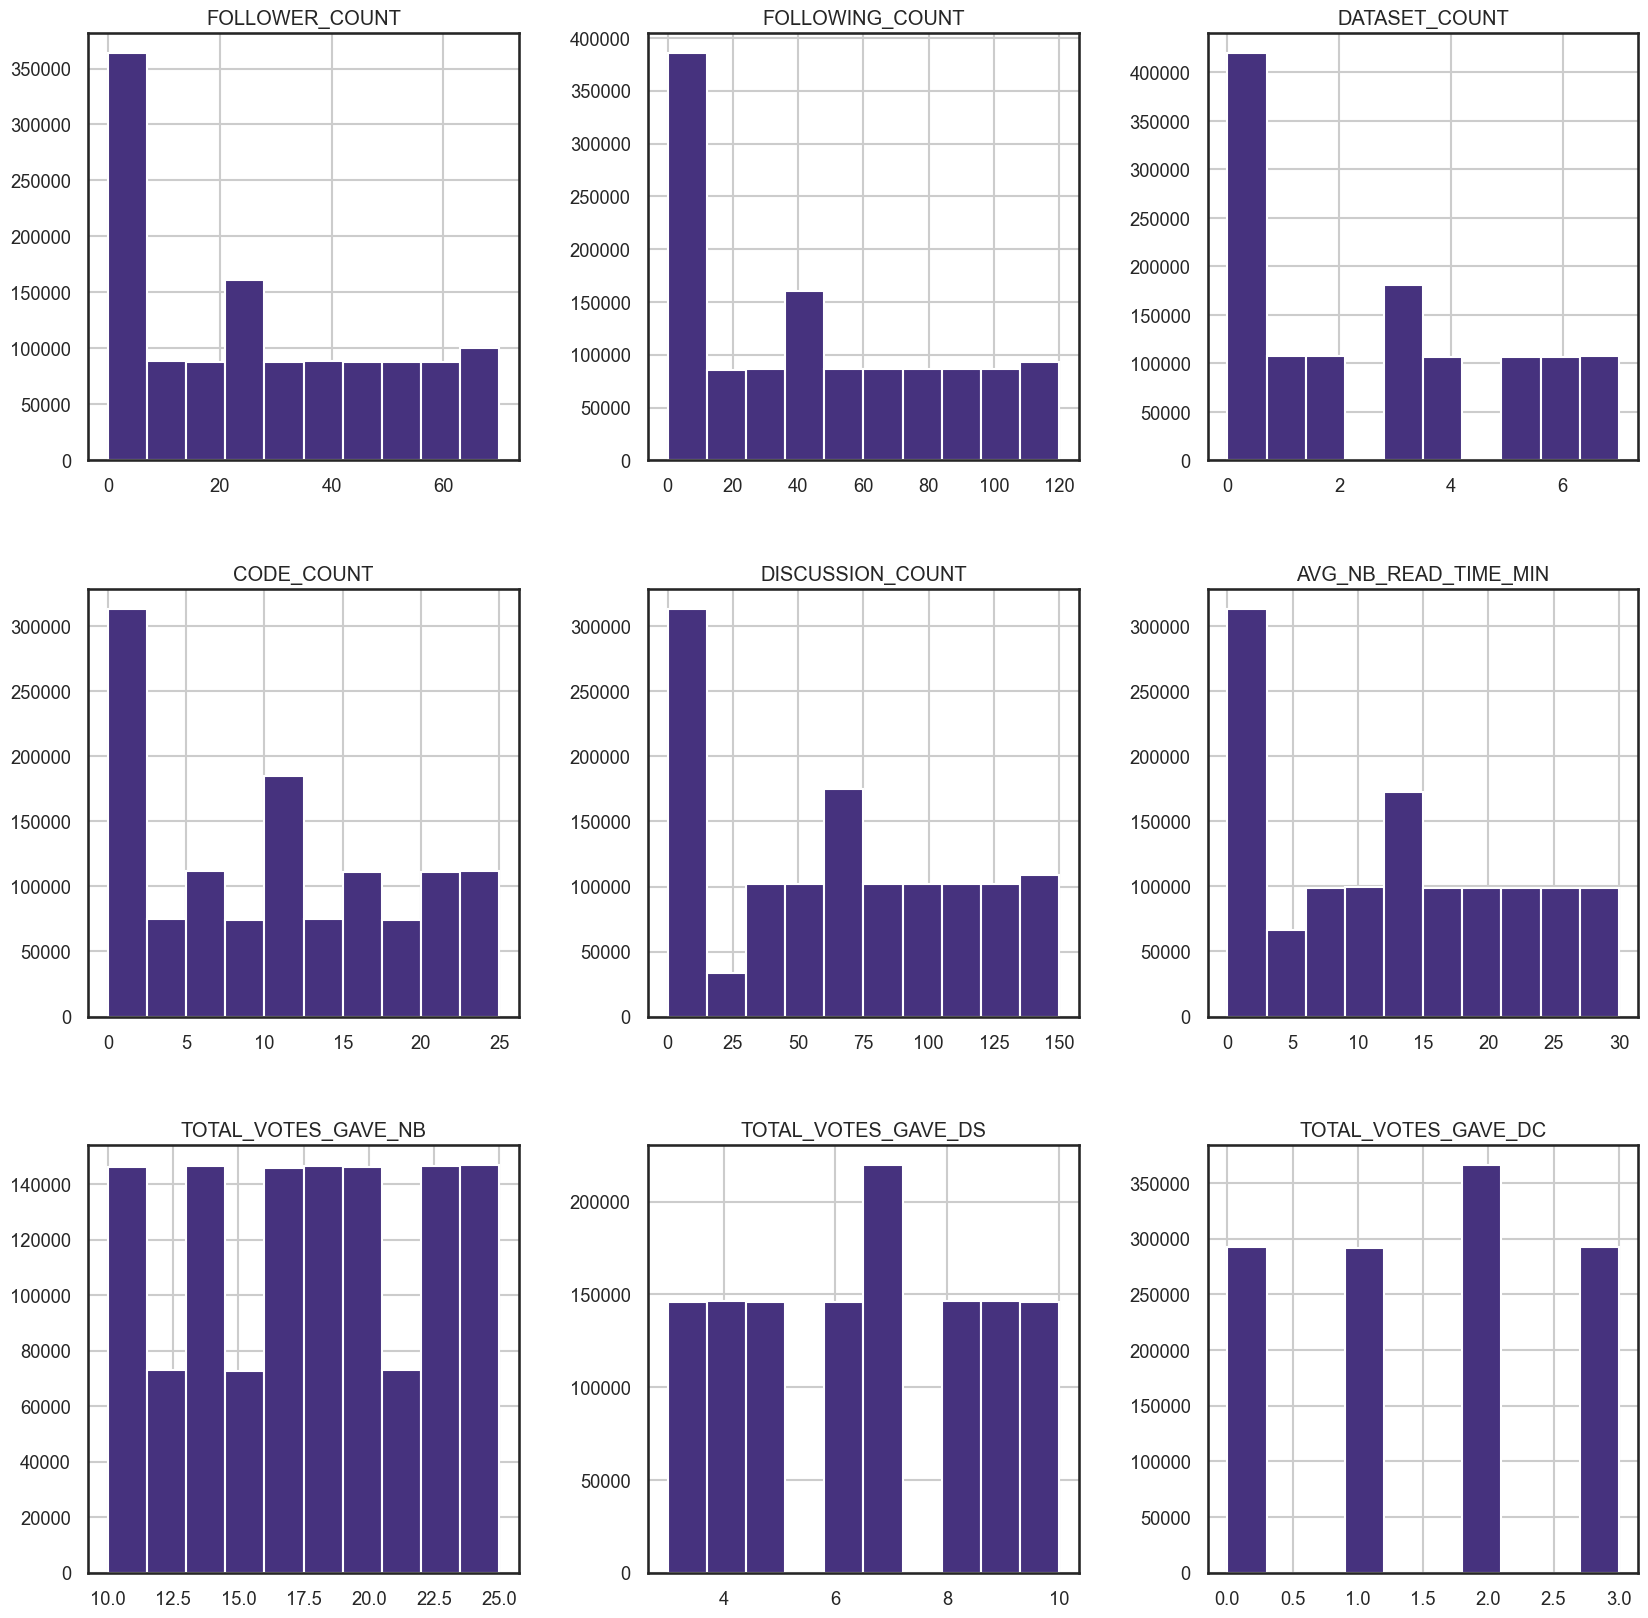

In [17]:
df.hist(figsize=(20,20))
plt.show()

## check each label percentage from dataset


In [18]:
print("Percentage of fake accounts is {:.2f}% and non-fake accounts is: {:.2f}%".format(
    df[df['ISBOT'] == True].shape[0] / df.shape[0]*100,
    df[df['ISBOT'] == False].shape[0] / df.shape[0]*100))

Percentage of fake accounts is 26.79% and non-fake accounts is: 73.21%


> It can be observed that the dataset is inbalanced (skewed towards non fake accounts).


## Down sampling (balancing dataset)


In [19]:
bot = df[df['ISBOT'] == True]
bot.shape

(332894, 12)

In [20]:
not_bot = df[df['ISBOT'] == False]
not_bot.shape


(909794, 12)

In [21]:
# Dealing with imbalanced dataset.
# Random under sampling.
not_bot_downsampled = resample(not_bot,
                                   replace=False,  # sample without replacement
                                   n_samples= bot.shape[0],  # to match minority class
                                   )  # reproducible results

### Combine the new dataset


In [22]:
main_df = pd.concat([bot, not_bot_downsampled])

In [23]:
main_df['ISBOT'].value_counts()

ISBOT
True     332894
False    332894
Name: count, dtype: int64

## Encoding dataset


In [24]:
le = LabelEncoder()


In [25]:
# Performing Label Encoding on the target variable.
main_df["ISBOT"] = le.fit_transform(main_df["ISBOT"])


In [26]:
X = main_df.drop('ISBOT', axis=1) # feature
y = main_df['ISBOT'] # target

In [27]:
# perform one-hot encoding on feature
X = pd.get_dummies(X)
X.head(10)

,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,GENDER_Female,GENDER_Male
5,False,2.0,2.0,0.0,0.0,0.0,0.62,18.0,9.0,2.0,False,True
7,False,2.0,1.0,0.0,0.0,6.0,1.85,21.0,3.0,1.0,True,False
15,False,0.0,2.0,0.0,0.0,10.0,1.32,23.0,8.0,2.0,False,True
20,False,0.0,3.0,0.0,0.0,4.0,0.83,19.0,9.0,1.0,True,False
25,False,2.0,0.0,0.0,1.0,4.0,1.49,15.0,9.0,0.0,False,True
27,False,2.0,2.0,0.0,0.0,7.0,0.96,11.0,7.0,2.0,False,True
30,False,2.0,2.0,3.0,10.0,1.0,0.60,25.0,6.0,3.0,False,True
31,False,0.0,2.0,0.0,0.0,0.0,0.40,18.0,6.0,2.0,False,True
33,False,0.0,0.0,0.0,10.0,7.0,13.00,19.0,8.0,0.0,False,True
39,False,0.0,0.0,0.0,10.0,11.0,0.36,14.0,5.0,1.0,False,True


## Scaling


In [28]:
scaler = MinMaxScaler()


In [29]:
X_norm = scaler.fit_transform(X)
X = pd.DataFrame(X_norm, columns=X.columns)

X

,IS_GLOGIN,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC,GENDER_Female,GENDER_Male
0,0.0,0.028571,0.016667,0.000000,0.00,0.000000,0.020674,0.533333,0.857143,0.666667,0.0,1.0
1,0.0,0.028571,0.008333,0.000000,0.00,0.040000,0.061687,0.733333,0.000000,0.333333,1.0,0.0
2,0.0,0.000000,0.016667,0.000000,0.00,0.066667,0.044015,0.866667,0.714286,0.666667,0.0,1.0
3,0.0,0.000000,0.025000,0.000000,0.00,0.026667,0.027676,0.600000,0.857143,0.333333,1.0,0.0
4,0.0,0.028571,0.000000,0.000000,0.04,0.026667,0.049683,0.333333,0.857143,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
665783,1.0,0.857143,0.425000,0.571429,0.12,0.386667,0.750250,0.733333,0.000000,0.666667,0.0,1.0
665784,0.0,0.500000,0.441667,0.428571,0.52,0.860000,0.443481,0.533333,0.571429,0.000000,0.0,1.0
665785,1.0,0.757143,0.275000,0.857143,0.60,0.280000,0.679893,0.800000,0.571429,0.000000,0.0,1.0
665786,1.0,0.385714,0.450000,0.000000,0.40,0.253333,0.989330,0.400000,0.714286,0.000000,0.0,1.0


# Train


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# For tracking all models' performance
all_models_results = []

### Helper functions


In [32]:
# evaluate models function
def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate the model and print results"""
    y_pred = model.predict(X_test)
    print(f"\n--- {model_name} Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    return y_pred, {
        'model': model_name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }


## Extra Trees



--- ExtraTreesClassifier Results ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66650
           1       1.00      1.00      1.00     66508

    accuracy                           1.00    133158
   macro avg       1.00      1.00      1.00    133158
weighted avg       1.00      1.00      1.00    133158



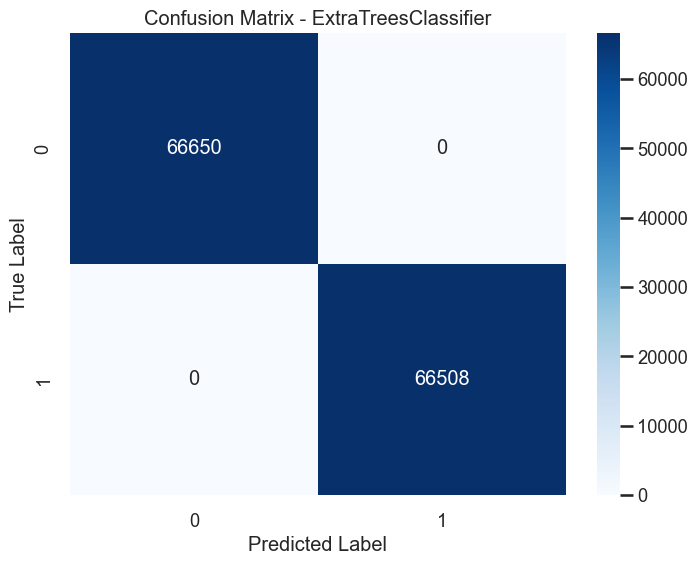

(array([1, 0, 0, ..., 1, 0, 1]),
 {'model': 'ExtraTreesClassifier',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0})

In [33]:
ET_model = ExtraTreesClassifier(random_state=42)
ET_model.fit(X_train, y_train)

evaluate_model(ET_model, X_test, y_test, 'ExtraTreesClassifier')


[6.96719198e-02 1.31952283e-01 1.36713008e-01 1.09442018e-01
 1.37341481e-01 2.08999205e-01 2.05811110e-01 2.41423707e-05
 1.97200579e-05 1.65198772e-05 4.30207421e-06 4.29076858e-06]


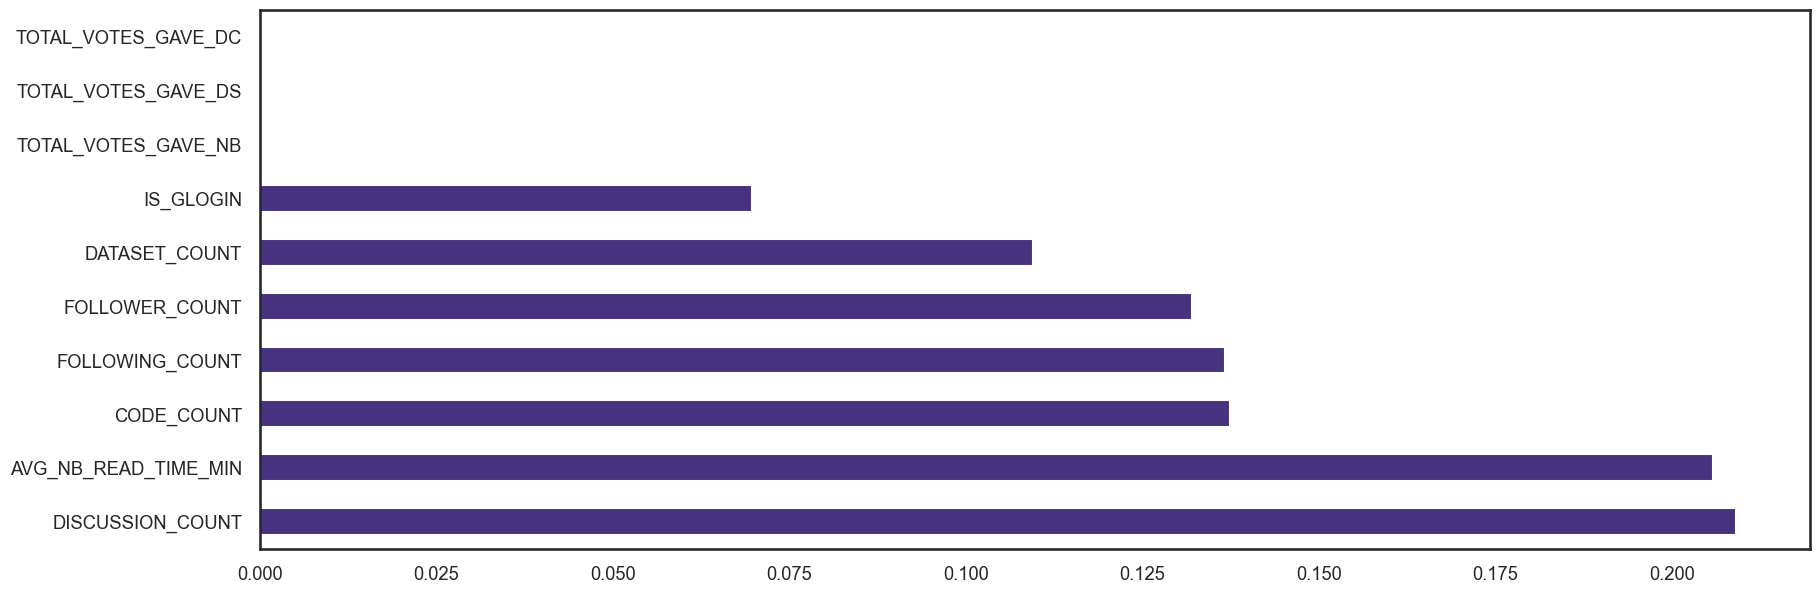

In [34]:
print(ET_model.feature_importances_)
feat_importance = pd.Series(ET_model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind = 'barh')

plt.show()

In [35]:
ET_model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tuning


In [ ]:
ET_param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [37]:
ET_grid_search = GridSearchCV(ET_model, 
                              ET_param_grid, 
                              cv=5, 
                              scoring='f1_weighted',
                              n_jobs=-1)

Training time: 14986.42 seconds
Best parameters for ExtraTreesClassifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

--- ExtraTreesClassifier Results ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66650
           1       1.00      1.00      1.00     66508

    accuracy                           1.00    133158
   macro avg       1.00      1.00      1.00    133158
weighted avg       1.00      1.00      1.00    133158



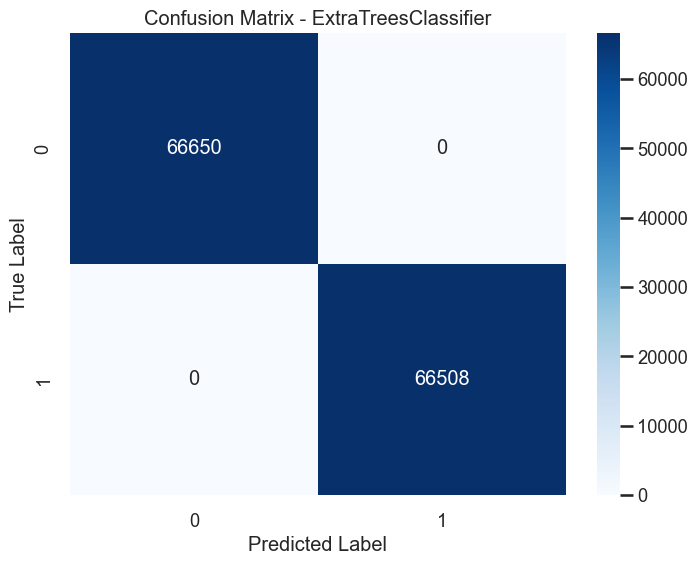

In [38]:
start_time = time()

ET_grid_search.fit(X_train, y_train)

print(f"Training time: {time() - start_time:.2f} seconds")
print("Best parameters for ExtraTreesClassifier:", ET_grid_search.best_params_)

best_ET = ET_grid_search.best_estimator_
_, ET_results = evaluate_model(best_ET, X_test, y_test, "ExtraTreesClassifier")

all_models_results.append(ET_results)

In [39]:
# # save the trained model to a file
joblib.dump(best_ET, './model/ET_model.pkl')


['./model/ET_model.pkl']

## Logistic Regression



--- LogisticRegresions Results ---
Accuracy: 0.9993
Precision: 0.9993
Recall: 0.9993
F1-score: 0.9993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66650
           1       1.00      1.00      1.00     66508

    accuracy                           1.00    133158
   macro avg       1.00      1.00      1.00    133158
weighted avg       1.00      1.00      1.00    133158



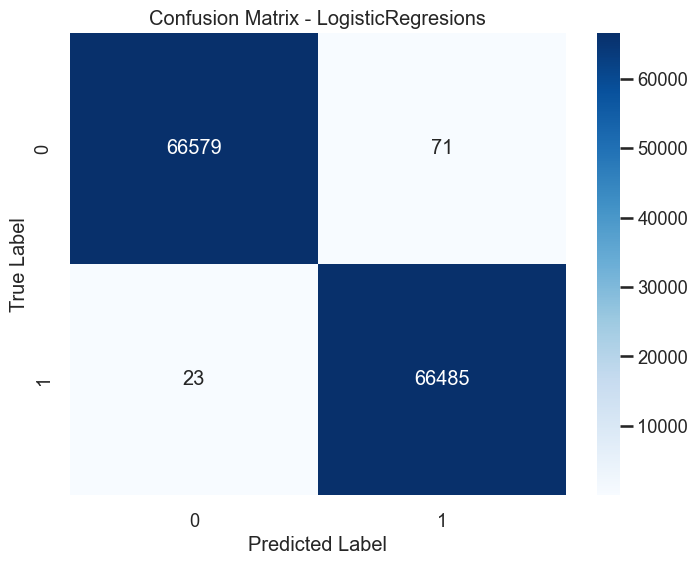

(array([1, 0, 0, ..., 1, 0, 1]),
 {'model': 'LogisticRegresions',
  'accuracy': 0.9992940717042912,
  'precision': 0.9992943317631799,
  'recall': 0.9992940717042912,
  'f1': 0.999294071883928})

In [40]:
# define the logistic regression model
LR_model = LogisticRegression(random_state=42)
LR_model.fit(X_train, y_train)

evaluate_model(LR_model, X_test, y_test, "LogisticRegresions")


In [41]:
LR_model.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tuning


In [42]:
LR_param_grid = {
    'C': [0.001, 0.01, 0.1],                 # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None], # Penalty type
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], # Algorithm
    'max_iter': [50, 75, 100]                    # Maximum iterations
}

In [ ]:
from sklearn.model_selection import ParameterGrid

# Define valid parameter combinations
LR_valid_params = []
for p in LR_param_grid['penalty']:
    for s in LR_param_grid['solver']:
        # Check valid combinations
        if p == 'l1' and s in ['newton-cg', 'sag']:
            continue
        if p == 'elasticnet' and s != 'saga':
            continue
        if p is None and s == 'liblinear':
            continue
        
        # Create a parameter grid for this valid combination
        valid_param = {
            'C': LR_param_grid['C'],
            'penalty': [p],
            'solver': [s],
            'max_iter': LR_param_grid['max_iter']
        }
        # Add all parameter combinations from this grid
        LR_valid_params.extend(list(ParameterGrid(valid_param)))


In [44]:
LR_grid_search = GridSearchCV(LR_model, 
                              LR_valid_params, 
                              cv=5, 
                              scoring='f1_weighted',
                              n_jobs=-1)

In [45]:
start_time = time()
LR_grid_search.fit(X_train, y_train)

print(f"Training time: {time() - start_time:.2f} seconds")
print("Best parameters for LogisticRegression:", LR_grid_search.best_params_)

best_LR = LR_grid_search.best_estimator_
_, LR_results = evaluate_model(best_LR, X_test, y_test, "LogisticRegression")

all_models_results.append(LR_results)

TypeError: Parameter grid for parameter 'C' needs to be a list or a numpy array, but got 0.001 (of type float) instead. Single values need to be wrapped in a list with one element.

In [ ]:

# # save the trained model to a file
joblib.dump(best_LR, './model/LR_model.pkl')


## Decission Tree



--- Decision Tree Results ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66650
           1       1.00      1.00      1.00     66508

    accuracy                           1.00    133158
   macro avg       1.00      1.00      1.00    133158
weighted avg       1.00      1.00      1.00    133158



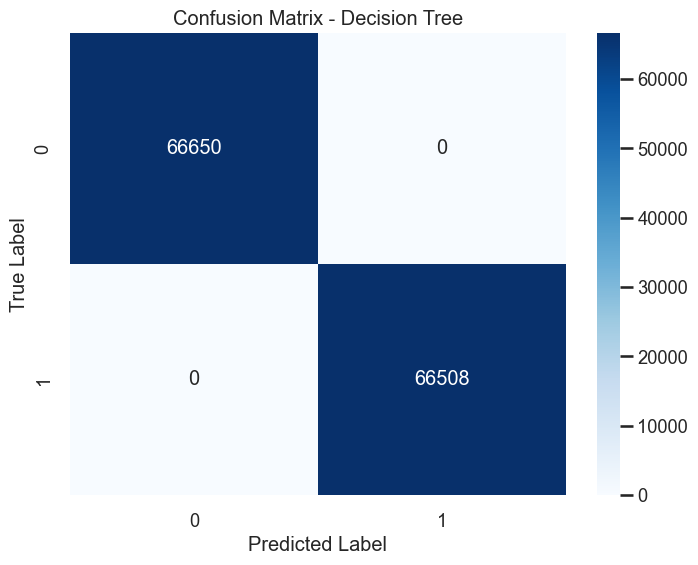

(array([1, 0, 0, ..., 1, 0, 1]),
 {'model': 'Decision Tree',
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1': 1.0})

In [46]:
# define the logistic regression model
DT_model = DecisionTreeClassifier(random_state=42)

DT_model.fit(X_train, y_train)

evaluate_model(DT_model, X_test, y_test, 'Decision Tree')

In [47]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

### Hyperparameter tuning


In [48]:
DT_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [49]:
DT_grid_search = GridSearchCV(DT_model, 
                              DT_param_grid, 
                              cv=5, 
                              scoring='f1_weighted',
                              n_jobs=-1)

Training time: 114.78 seconds
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

--- DecisionTreeClassifier Results ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66650
           1       1.00      1.00      1.00     66508

    accuracy                           1.00    133158
   macro avg       1.00      1.00      1.00    133158
weighted avg       1.00      1.00      1.00    133158



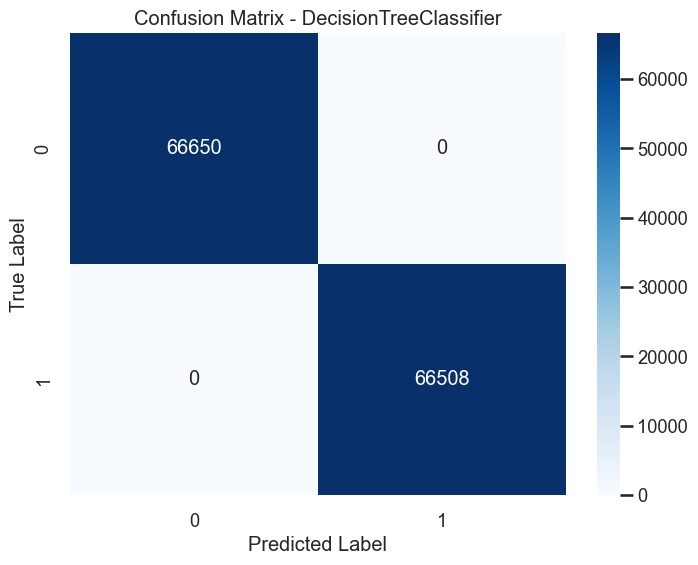

In [50]:
start_time = time()
DT_grid_search.fit(X_train, y_train)

print(f"Training time: {time() - start_time:.2f} seconds")
print("Best parameters for DecisionTreeClassifier:", DT_grid_search.best_params_)

best_DT = DT_grid_search.best_estimator_
_, DT_results = evaluate_model(best_DT, X_test, y_test, "DecisionTreeClassifier")

all_models_results.append(DT_results)

In [51]:
# save the trained model to a file
joblib.dump(best_DT, './model/DT_model.pkl')


['./model/DT_model.pkl']

## Support Vector Machine



--- SVC Results ---
Accuracy: 0.9994
Precision: 0.9994
Recall: 0.9994
F1-score: 0.9994

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66650
           1       1.00      1.00      1.00     66508

    accuracy                           1.00    133158
   macro avg       1.00      1.00      1.00    133158
weighted avg       1.00      1.00      1.00    133158



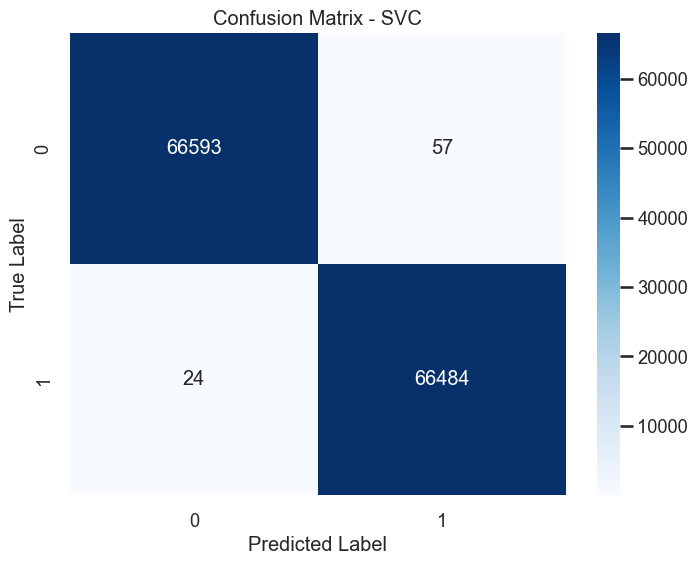

(array([1, 0, 0, ..., 1, 0, 1]),
 {'model': 'SVC',
  'accuracy': 0.9993917000856126,
  'precision': 0.9993918230930812,
  'recall': 0.9993917000856126,
  'f1': 0.999391700209015})

In [52]:
# define the SVM model
SVM_model = SVC(kernel = 'poly', random_state=42)

SVM_model.fit(X_train, y_train)

evaluate_model(SVM_model, X_test, y_test, 'SVC')

In [53]:
SVM_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Hyperparameter tuning


In [54]:
SVM_param_grid = {
    'C': [0.1, 1, 10,],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'probability': [True]  # Set to True to enable probability estimates
}

In [55]:
SVM_grid_search = GridSearchCV(SVM_model, 
                               SVM_param_grid, 
                               cv=5, 
                               scoring='f1_weighted',
                               n_jobs=-1)

In [56]:
start_time = time()
SVM_grid_search.fit(X_train, y_train)

print(f"Training time: {time() - start_time:.2f} seconds")
print("Best parameters for SVC(SVM):", SVM_grid_search.best_params_)

best_SVM = SVM_grid_search.best_estimator_
_, SVM_results = evaluate_model(best_SVM, X_test, y_test, "SVC")

all_models_results.append(SVM_results)

KeyboardInterrupt: 

In [ ]:
# save the trained model to a file
joblib.dump(best_SVM, './model/SVM_model.pkl')


## Gradient Boosting


In [ ]:
GB_model = GradientBoostingClassifier(random_state=42)

GB_model.fit(X_train, y_train)

evaluate_model(GB_model, X_test, y_test, 'GradientBoostingClassifier')

In [ ]:
GB_model.get_params()

### Hyperparameter tuning


In [ ]:
GB_param_grid = {
    'n_estimators': [50, 75, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
GB_grid_search = GridSearchCV(GB_model, 
                              GB_param_grid, 
                              cv=5, 
                              scoring='f1_weighted',
                              n_jobs=-1)

In [ ]:
start_time = time()
GB_grid_search.fit(X_train, y_train)
print(f"Training time: {time() - start_time:.2f} seconds")
print("Best parameters for GradientBoostingClassifier:", GB_grid_search.best_params_)
best_GB = GB_grid_search.best_estimator_
_, GB_results = evaluate_model(best_GB, X_test, y_test, "GradientBoostingClassifier")
all_models_results.append(GB_results)

In [ ]:
joblib.dump(best_GB, './model/GB_model.pkl')

# Model Comparison


In [ ]:
results_df = pd.DataFrame(all_models_results)

results_df.sort_values('f1', ascending=False)

In [ ]:
# Visualize results
plt.figure(figsize=(12, 8))
metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='model', y=metric, data=results_df)
    plt.title(f'Model Comparison - {metric.capitalize()}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
if hasattr(best_ET, 'feature_importances_'):
    best_model = max(all_models_results, key=lambda x: x['f1'])
    print(f"\n=== Feature Importance for {best_model['model']} ===")
    
    # Get the best model
    if best_model['model'] == 'ExtraTreesClassifier':
        model_with_features = best_ET
    elif best_model['model'] == 'GradientBoostingClassifier':
        model_with_features = best_GB
    elif best_model['model'] == 'DecisionTreeClassifier':
        model_with_features = best_DT
    
    if hasattr(model_with_features, 'feature_importances_'):
        # Assuming X is a DataFrame with column names
        feature_names = X.columns
        feature_importances = model_with_features.feature_importances_
        
        # Sort features by importance
        sorted_idx = np.argsort(feature_importances)
        plt.figure(figsize=(10, 8))
        plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance - {best_model["model"]}')
        plt.tight_layout()
        plt.show()